In [1]:
%cd /content/gdrive/MyDrive/Colab_Notebooks/My_projects/Drone_detection/Data/

/content/gdrive/MyDrive/Colab_Notebooks/My_projects/Drone_detection/Data


In [2]:
!pip install detecto

In [3]:
!pip install pytorchtools

In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import  utils, visualize
import pytorchtools
import core
from detecto.core import Model, Dataset, DataLoader

In [5]:
#To check if GPU is available or not to load the dataset
torch.cuda.is_available()

True

In [6]:
%ls

 annots/                                   IR_label.json
'Copy of F-RCNN With ResNet18 FPN.ipynb'   IR.mp4
 core.py                                   __pycache__/
 Drone_TrainSet_100Snippet/                RGB_label.json
 Drone_TrainSet_XMLs_100Snippet/           RGB.mp4
 Drone_TrainSet_XMLs_100Snippet.csv        runs/
 images/                                   Zip/


In [8]:
# Do this twice: once for our training labels and once for our validation labels
utils.xml_to_csv('Drone_TrainSet_XMLs_100Snippet/', 'Drone_TrainSet_XMLs_100Snippet.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,pos_G2P1090.jpg,640,480,drone,273,74,299,100,0
1,2077.jpg,640,480,drone,353,212,566,310,1
2,pos_G3P3932.jpg,640,480,drone,338,258,495,404,2
3,pos_G3P18220.jpg,640,480,drone,252,1,308,43,3
4,2769.jpg,640,480,drone,269,72,366,147,4
...,...,...,...,...,...,...,...,...,...
98,2703.jpg,640,480,drone,310,181,350,222,95
99,pos_G3P13979.jpg,640,480,drone,341,165,363,183,96
100,pos_G3P17017.jpg,640,480,drone,275,199,292,225,97
101,2806.jpg,640,480,drone,88,217,246,307,98


In [7]:
% ls

 annots/                                   IR_label.json
'Copy of F-RCNN With ResNet18 FPN.ipynb'   IR.mp4
 core.py                                   __pycache__/
 Drone_TrainSet_100Snippet/                RGB_label.json
 Drone_TrainSet_XMLs_100Snippet/           RGB.mp4
 Drone_TrainSet_XMLs_100Snippet.csv        runs/
 images/                                   Zip/


yes
torch.Size([3, 480, 640])
{'boxes': tensor([[275, 199, 292, 225]]), 'labels': 'drone'}


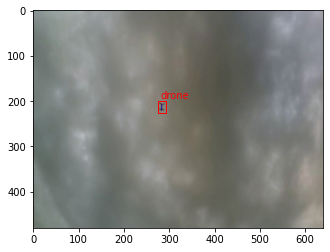

In [8]:
# Load Train Dataset
dataset = core.Dataset( 'Drone_TrainSet_XMLs_100Snippet.csv','Drone_TrainSet_100Snippet/')

im, tar = dataset[100]

print(im.shape)
print(tar)

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(im, tar['boxes'], tar['labels'])

In [9]:
model = core.Model(classes=['drone'])

In [11]:
# Train the model
#Skip this part if you just need to predict the model with saved weight. Go to next code of prediction.
model.fit(dataset,val_dataset= None,epochs=50,verbose = True)


0
DEBUG1 : dataset
Epoch 1 of 3
Epoch 2 of 3
Epoch 3 of 3


In [17]:
model.save('model_weights.pth')

In [19]:
from detecto.core import Model
from detecto.utils import read_image
#model = Model.load('model_weights.pth', ['horse', 'zebra'])

In [33]:
import glob
l = glob.glob('images/*.jpg')
img = read_image(l[86])

In [34]:
labels, boxes, scores = model.predict(img)

In [35]:
labels

['drone']

In [36]:
boxes

tensor([[497.4934, 553.8461, 619.9241, 733.1064]])

In [38]:
scores

tensor([0.0579])

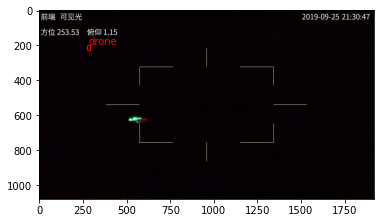

In [39]:
visualize.show_labeled_image(img, tar['boxes'], tar['labels'])

In [ ]:
torch.save(model, 'checkpoint_10epochs_new.pth')

In [ ]:
cls = ['drone']

model = core.Model(cls)

In [ ]:
%pwd

In [ ]:
model = core.Model.load('checkpoint_10epochs_new.pth', cls)

In [ ]:
#To predict the classes in Video

visualize.detect_video(model, 'Input/DJI_0036.mov', 'Output/DJI_0036.avi', score_filter=0.5)

In [ ]:
from detecto.utils import read_image
from detecto.visualize import show_labeled_image

In [ ]:
#Just for testing purpose. Do Not Run. Need to modify show_labeled_image for this.

# image = read_image('Test_pics/Test3.png')
# labels, boxes, scores = model.predict(image)
# sc=scores.tolist()
# box=boxes.tolist()
# # print(sc)

# for i in range(len(sc)):
# #     if sc[i] <=0.1:
#     show_labeled_image(image, box[i], sc[i], labels[i])

In [ ]:
# type(labels)

list

In [ ]:
# box=boxes.tolist()

In [ ]:
# print(box[0])

In [ ]:
# print(box)

In [ ]:
%pwd

'/content'